In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def cubic_spline_interpolation(t, y):
    n = len(t) - 1  # Number of intervals

    # Step 1: Compute h_i (differences between t_i+1 and t_i)
    h = np.diff(t)

    # Step 2: Set up the tridiagonal system for c_i
    A = np.zeros((n+1, n+1))
    B = np.zeros(n+1)

    # Natural spline boundary conditions
    A[0, 0] = 1
    A[n, n] = 1

    # Fill the tridiagonal matrix A and vector B
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        B[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Step 3: Solve for c_i
    c = np.linalg.solve(A, B)

    # Step 4: Compute b_i and d_i
    b = np.zeros(n)
    d = np.zeros(n)
    for i in range(n):
        b[i] = (y[i+1] - y[i]) / h[i] - h[i] * (2 * c[i] + c[i+1]) / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    # Step 5: Return coefficients
    return y[:-1], b, c[:-1], d



In [5]:
# importing data
data = pd.read_excel('hw1_q2.xlsx')
data

,Time to Maturity,Yield Rate
0,0.25,0.0150
1,0.50,0.0160
2,1.00,0.0180
3,2.00,0.0210
4,3.00,0.0240
5,5.00,0.0330
6,7.00,0.0374
7,10.00,0.0405
8,20.00,0.0435


In [7]:
t = np.array(data["Time to Maturity"])# Time to maturity
y = np.array(data["Yield Rate"])  # Yield rates


In [9]:
# Perform cubic spline interpolation
a, b, c, d = cubic_spline_interpolation(t, y)

In [11]:
# Evaluate the spline at new points
def evaluate_spline(t, a, b, c, d, x):
    n = len(t) - 1
    for i in range(n):
        if t[i] <= x <= t[i+1]:
            dx = x - t[i]
            return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None

In [13]:
# Generate points for plotting
t_new = np.linspace(t.min(), t.max(), 100)
y_new = [evaluate_spline(t, a, b, c, d, x) for x in t_new]

In [15]:
# Find the value at year 4
year = 4
value_at_4 = evaluate_spline(t, a, b, c, d, year)
print(f"Interpolated value at year {year}: {value_at_4:.6f}")

Interpolated value at year 4: 0.028496


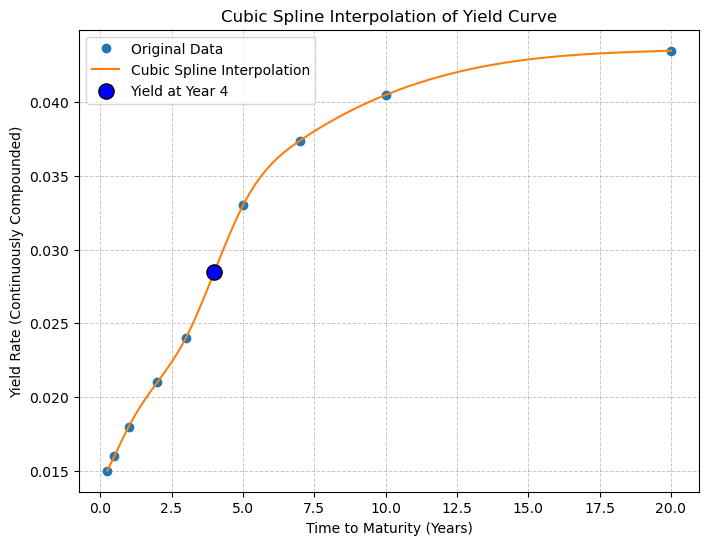

In [25]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t, y, 'o', label='Original Data')
plt.plot(t_new, y_new, label='Cubic Spline Interpolation')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Yield Rate (Continuously Compounded)')
plt.title('Cubic Spline Interpolation of Yield Curve')

plt.scatter(year, value_at_4, color='blue', edgecolors='black', s=120, label='Yield at Year 4', zorder=3)
plt.grid(linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)

plt.savefig('cubic_spline.png')

plt.legend()
plt.grid(True)
plt.show()


In [19]:
# Print the closed-form solution for each interval
print("\nClosed-form solutions for each interval:")
for i in range(len(t) - 1):
    print(f"For interval [{t[i]}, {t[i+1]}]:")
    print(f"S_{i}(x) = {a[i]:.6f} + {b[i]:.6f}(x - {t[i]:.2f}) + {c[i]:.6f}(x - {t[i]:.2f})^2 + {d[i]:.6f}(x - {t[i]:.2f})^3")


Closed-form solutions for each interval:
For interval [0.25, 0.5]:
S_0(x) = 0.015000 + 0.003971(x - 0.25) + 0.000000(x - 0.25)^2 + 0.000468(x - 0.25)^3
For interval [0.5, 1.0]:
S_1(x) = 0.016000 + 0.004058(x - 0.50) + 0.000351(x - 0.50)^2 + -0.000935(x - 0.50)^3
For interval [1.0, 2.0]:
S_2(x) = 0.018000 + 0.003708(x - 1.00) + -0.001052(x - 1.00)^2 + 0.000345(x - 1.00)^3
For interval [2.0, 3.0]:
S_3(x) = 0.021000 + 0.002637(x - 2.00) + -0.000018(x - 2.00)^2 + 0.000381(x - 2.00)^3
For interval [3.0, 5.0]:
S_4(x) = 0.024000 + 0.003744(x - 3.00) + 0.001126(x - 3.00)^2 + -0.000374(x - 3.00)^3
For interval [5.0, 7.0]:
S_5(x) = 0.033000 + 0.003760(x - 5.00) + -0.001118(x - 5.00)^2 + 0.000169(x - 5.00)^3
For interval [7.0, 10.0]:
S_6(x) = 0.037400 + 0.001315(x - 7.00) + -0.000105(x - 7.00)^2 + 0.000004(x - 7.00)^3
For interval [10.0, 20.0]:
S_7(x) = 0.040500 + 0.000784(x - 10.00) + -0.000073(x - 10.00)^2 + 0.000002(x - 10.00)^3
